In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
def ellipse(a,b, x,y):
    return (x**2/a**2 + y**2 / b**2 - 1.)

In [151]:
def upper_ellipse_x(a, b, x):    
    return b/a*np.sqrt(a**2 - x**2) 

def lower_ellipse_x(a, b, x):
    return -b/a*np.sqrt(a**2 - x**2) 

def upper_ellipse_y(a, b, y):    
    return a/b*np.sqrt(b**2 - y**2) 

def lower_ellipse_y(a, b, y):
    return -a/b*np.sqrt(b**2 - y**2) 

def upper_circle(R, xq, yq, x):
    return yq + np.sqrt(R**2 - (x - xq)**2)

def lower_circle(R, xq, yq, x):
    return yq - np.sqrt(R**2 - (x - xq)**2)

## Problem Statement

We want to find the minimal distance between an arbitrary point and an ellipse described by the semi axes $a$ and $b$.

An arbitrary ellipse is governed by the following equation:

$(\frac{x}{a})^2 + (\frac{y}{b})^2 = 1$

The minimal distance from a point $P(x_\mathrm{q}, y_\mathrm{q})$ is equivalent to the radius of a circle around that point which tangentially touches the ellipse.

The circle can be described by

$(x - x_\mathrm{q})^2 + (y - y_\mathrm{q})^2 = R^2$ .

Then, the minimum distance is equal to $R$.

Since both equations have to be fulfilled, we substitute the ellipse equation into the circle equation and get

$R^2(x) = (x - x_\mathrm{q})^2 + (\pm \frac{b}{a} \cdot \sqrt{a^2 - x^2}) - y_\mathrm{q})^2$.

This is our objective function, that we want to minimize.

### Example
Let's look at an example to get a feeling for the problem. I have chosen an ellipse with $a=2, b=1$ and the query point is $Q(-0.5; -0.5)$.

In [122]:
a = 1
b = 2
xq = 0.
yq = 1.5
R = 0.46383587319470987

x = np.linspace(-0.9999*a, 0.9999*a, 200)
y = np.linspace(-0.9999*1.2*b, 0.9999*1.2*b, 200)
x_c = np.linspace(xq - 0.9999*R, xq + 0.999*R, 200)
x_c_06 = np.linspace(xq - 0.9999*0.6*R, xq + 0.9999*0.6*R, 200)
x_c_02 = np.linspace(xq - 0.9999*0.2*R, xq + 0.9999*0.2*R, 200)

In the following figure you can see, the ellipse (orange) and three circles with inrceasing radius around the query point. It's pretty clear this way that the radius of the blue circle must be the minimum distance.

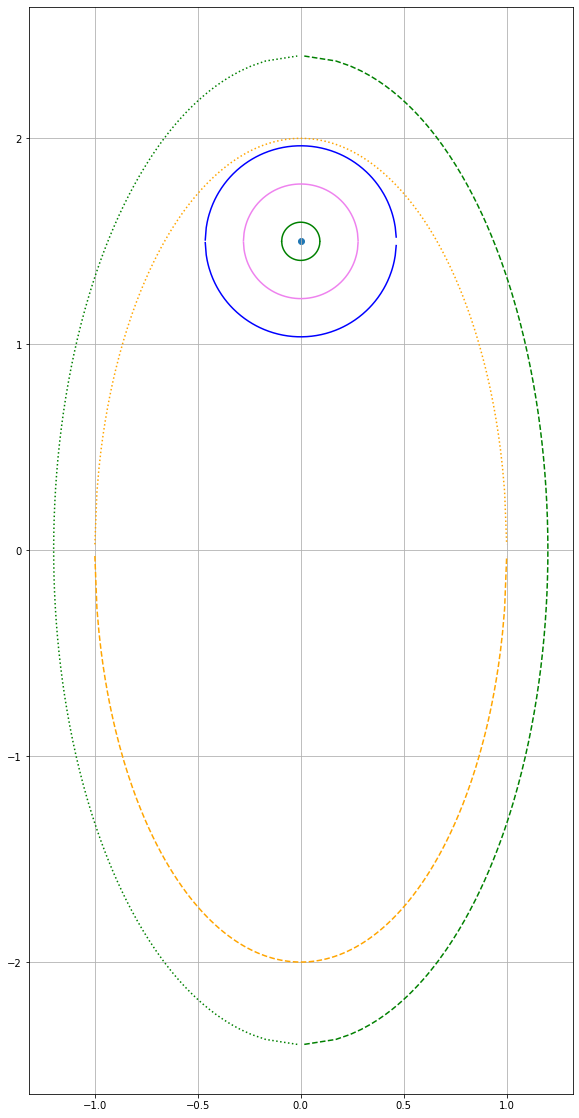

In [123]:
fig, ax = plt.subplots(figsize=(10, 10*b//a))
ax.plot(x, upper_ellipse_x(a,b,x), color="orange", linestyle="dotted")
ax.plot(x, lower_ellipse_x(a,b,x), color="orange", linestyle="dashed")
ax.plot(upper_ellipse_y(1.2*a,1.2*b,y),y, color="green", linestyle="dashed")
ax.plot(lower_ellipse_y(1.2*a,1.2*b,y),y, color="green", linestyle="dotted")
ax.plot(x_c_02, upper_circle(0.2*R, xq, yq, x_c_02), color="green")
ax.plot(x_c_02, lower_circle(0.2*R, xq, yq, x_c_02), color="green")
ax.plot(x_c_06, upper_circle(0.6*R, xq, yq, x_c_06), color="violet")
ax.plot(x_c_06, lower_circle(0.6*R, xq, yq, x_c_06), color="violet")
ax.plot(x_c, upper_circle(R, xq, yq, x_c), color="blue")
ax.plot(x_c, lower_circle(R, xq, yq, x_c), color="blue")
ax.scatter(xq, yq)
ax.grid()
ax.set_aspect(1)

plt.show()

## Solution

The main problem is, that the equation is non-linear and cannot be solved analytically, which is a major problem for calculations in the time-critical exectution path of the software.

We will use the Newton-Raphson iteration method which requires the function to find the root of as well as its derivative:

$x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}$.

In our case, we need to minimize $F(x) = R^2$ and therefore find the root of the first derivative $F' = f = (R^2)''$.

In [255]:
def distance_upper_x(a,b,xq, yq, x):
    
    det = 0;
    if np.size(x) == 1:
        det = 0
        if x**2 > a**2:
            det = x**2 - a**2
        else:
            det = a**2 - x**2
    else:
        det = a**2 - x**2
    sqrt = np.sqrt(det)
    
    return (xq - x)**2 + (yq - b/a*sqrt)**2

def distance_lower_x(a,b,xq, yq, x):
    det = 0;
    if np.size(x) == 1:
        det = 0
        if x**2 > a**2:
            det = x**2 - a**2
        else:
            det = a**2 - x**2
    else:
        det = a**2 - x**2
    sqrt = np.sqrt(det)
    
    return (xq - x)**2 + (yq + b/a *sqrt)**2

def distance_upper_y(a,b,xq, yq, y):   
    det = 0;
    if np.size(y) == 1:
        det = 0
        if y**2 > b**2:
            det = y**2 - b**2
        else:
            det = b**2 - y**2
    else:
        det = b**2 - y**2
    sqrt = np.sqrt(det)
    
    return (yq - y)**2 + (xq - a/b*sqrt)**2

def distance_lower_y(a,b,xq, yq, y):
    
    det = 0;
    if np.size(y) == 1:
        det = 0
        if y**2 > b**2:
            det = y**2 - b**2
        else:
            det = b**2 - y**2
    else:
        det = b**2 - y**2
    sqrt = np.sqrt(det)
    
    return (yq - y)**2 + (xq + a/b*sqrt)**2

def distance_upper_deriv(a, b, xq, yq, x):
    det = 0;
    if np.size(x) == 1:
        det = 0
        if x**2 > a**2:
            det = x**2 - a**2
        else:
            det = a**2 - x**2
    else:
        det = a**2 - x**2
    sqrt = np.sqrt(det)
    
    return -2*(xq - x) - 2 * b * x * (b/a * sqrt - yq) / (a * sqrt)

def distance_lower_deriv(a, b, xq, yq, x):
    det = 0;
    if np.size(x) == 1:
        det = 0
        if x**2 > a**2:
            det = x**2 - a**2
        else:
            det = a**2 - x**2
    else:
        det = a**2 - x**2
    sqrt = np.sqrt(det)
    
    return -2*(xq - x) - 2 * b * x * (b/a * sqrt + yq) / (a * sqrt)


def distance_upper_deriv_y(a, b, xq, yq, y):
    det = 0;
    if np.size(y) == 1:
        det = 0
        if y**2 > b**2:
            det = y**2 - b**2
        else:
            det = b**2 - y**2
    else:
        det = b**2 - y**2
    sqrt = np.sqrt(det)
    
    return -2*(yq - y) - 2 * a * y * (a/b * sqrt + xq) / (b * sqrt)

def distance_lower_deriv_y(a, b, xq, yq, y):
    det = 0;
    if np.size(y) == 1:
        det = 0
        if y**2 > b**2:
            det = y**2 - b**2
        else:
            det = b**2 - y**2
    else:
        det = b**2 -y**2
    sqrt = np.sqrt(det)
    
    return -2*(yq - y) - 2 * a * y * (a/b * sqrt - xq) / (b * sqrt)

def distance_upper_second_deriv(a, b, xq, yq, x):
    det = 0;
    if np.size(x) == 1:
        det = 0
        if x**2 > a**2:
            det = x**2 - a**2
        else:
            det = a**2 - x**2
    else:
        det = a**2 - x**2
    sqrt = np.sqrt(det)
    
    return 2*a**2/det + 2*a*b*yq/det**(3/2) + 2*b**2*x**2/(a**2 * det) - 2*b**2/det - 2*x**2/det
    

def distance_lower_second_deriv(a, b, xq, yq, x):
    det = 0;
    if np.size(x) == 1:
        det = 0
        if x**2 > a**2:
            det = x**2 - a**2
        else:
            det = a**2 - x**2
    else:
        det = a**2 - x**2
    sqrt = np.sqrt(det)
    
    return 2*a**2/det - 2*a*b*yq/(det)**(3/2) + 2*b**2*x**2/(a**2 * det) - 2*b**2/det - 2*x**2/det
    #return (2 * b**2 * x**2)/(a**4 - a**2 * x**2) + 2*(b**2 + x**2)/(a**2 - x**2) - 2*a**2/(a**2 - x**2) - 2 * b * a * yq/(a**2 - x**2)**(3/2)

def distance_upper_newton_x(a,b, xq, yq, x):
    det = 0;
    if np.size(x) == 1:
        det = 0
        if x**2 > a**2:
            det = x**2 - a**2
        else:
            det = a**2 - x**2
    else:
        det = a**2 - x**2
    sqrt = np.sqrt(det)
    
    return (( a**3 * xq - a * x**2 * xq) * sqrt + b * x**3 * yq ) / (( a**3 - a * b**2 - a * x**2 + b**2 * x**2 / a) * sqrt + a**2 * b * yq)

def distance_lower_newton_x(a,b, xq, yq, x):
    det = 0;
    if np.size(x) == 1:
        det = 0
        if x**2 > a**2:
            det = x**2 - a**2
        else:
            det = a**2 - x**2
    else:
        det = a**2 - x**2
    sqrt = np.sqrt(det)    
        
    return ((-a**3 * xq + a * x**2 * xq) * sqrt + b * x**3 * yq ) / ((-a**3 + a * b**2 + a * x**2 - b**2 * x**2 / a) * sqrt + a**2 * b * yq)

def distance_upper_newton_y(a,b, xq, yq, y):
    det = 0;
    if np.size(y) == 1:
        det = 0
        if y**2 > b**2:
            det = y**2 - b**2
        else:
            det = b**2 - y**2
    else:
        det = b**2 - y**2
    sqrt = np.sqrt(det)
    
    return (( b**3 * yq - b * y**2 * yq) * sqrt + a * y**3 * xq ) / (( b**3 - b * a**2 - b * y**2 + a**2 * y**2 / b) * sqrt + b**2 * a * xq)

def distance_lower_newton_y(a,b, xq, yq, y):
    det = 0;
    if np.size(y) == 1:
        det = 0
        if y**2 > b**2:
            det = y**2 - b**2
        else:
            det = b**2 - y**2
    else:
        det = b**2 - y**2
    sqrt = np.sqrt(det)
    
    return ((-b**3 * yq + b * y**2 * yq) * sqrt + a * y**3 * xq ) / ((-b**3 + b * a**2 + b * y**2 - a**2 * y**2 / b) * sqrt + b**2 * a * xq)


Since our equation is split into an upper half and a lower half, we always need to consider both when optimizing our problem. Below, the distance function and its first and second derivative are plotted. As you can see, the minimum of the lower half is much smaller than that of the upper half.

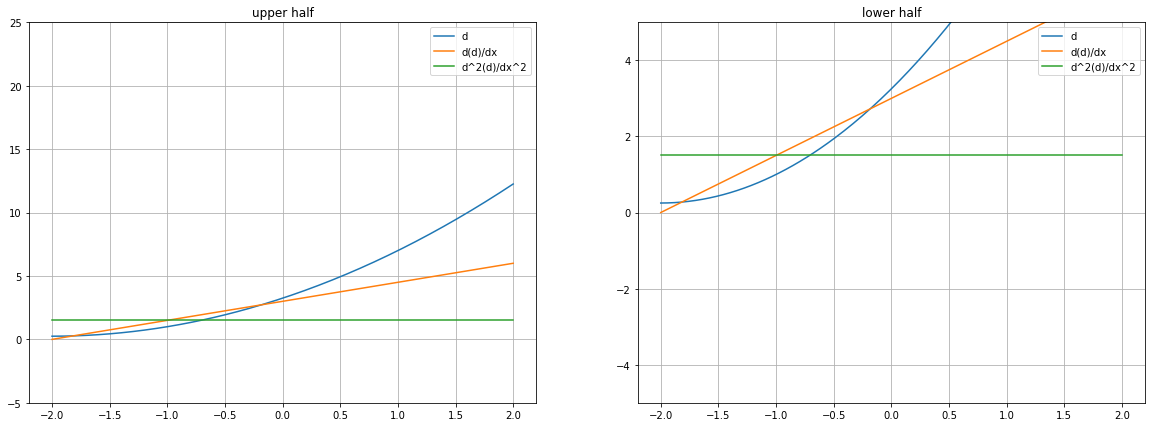

In [256]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
ax.plot(x, distance_upper_x(a,b,xq,yq, x), label="d")
ax.plot(x, distance_upper_deriv(a,b,xq,yq, x), label="d(d)/dx")
ax.plot(x, distance_upper_second_deriv(a,b,xq,yq, x), label="d^2(d)/dx^2")
ax.grid()
ax.set_title('upper half')
ax.legend()

ax2.plot(x, distance_lower_x(a,b,xq,yq, x), label="d")
ax2.plot(x, distance_lower_deriv(a,b,xq,yq, x), label="d(d)/dx")
ax2.plot(x, distance_lower_second_deriv(a,b,xq,yq, x), label="d^2(d)/dx^2")
ax2.grid()
ax2.set_title('lower half')
ax2.legend()

ax.set_ylim([-5,25])
ax2.set_ylim([-5,5])
plt.show()

The picture below show the correct solution together with the ellipse and the query point.

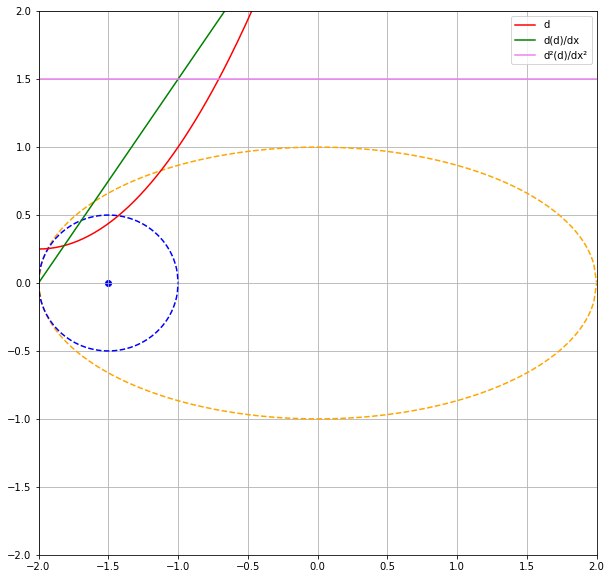

In [257]:
fig, ax = plt.subplots(figsize=(5*(a//b), 10))
ax.plot(x, upper_ellipse_x(a,b,x), color="orange", linestyle="dashed")
ax.plot(x, lower_ellipse_x(a,b,x), color="orange", linestyle="dashed")
ax.plot(x_c, upper_circle(R, xq, yq, x_c), color="blue", linestyle="dashed")
ax.plot(x_c, lower_circle(R, xq, yq, x_c), color="blue", linestyle="dashed")
ax.scatter(xq, yq, color="blue")

#ax.plot(x, distance_upper_x(a,b,xq,yq, x), label="d", color="red")
#ax.plot(x, distance_upper_deriv(a,b,xq,yq, x), label="d(d)/dx", color="green")
#ax.plot(x, distance_upper_second_deriv(a,b,xq,yq, x), label="d²(d)/dx²", color="violet")

ax.plot(x, distance_lower_x(a,b,xq,yq, x), label="d", color="red")
ax.plot(x, distance_lower_deriv(a,b,xq,yq, x), label="d(d)/dx", color="green")
ax.plot(x, distance_lower_second_deriv(a,b,xq,yq, x), label="d²(d)/dx²", color="violet")

ax.set_xlim([-a,a])
ax.set_ylim([-2*b, 2*b])

ax.grid()
ax.legend()

plt.show()

These functions provide the newton iterations for the lower and upper part of the ellipse which will later be used to find the $x$ value corresponding to the minimal distance.

In [258]:
def newton(a,b,xq,yq):
    # case 1 upper (x subs y)
    if (xq >= 0 and yq >= b/a*xq) or (xq <= 0 and yq >= -b/a*xq):
        print("CASE 1")
        x0 = 0.95*a
        if xq < 0:
            x0 = -0.95*a
            
        for i in range(0,100):
            #print(x0)
            xn = distance_upper_newton_x(a,b,xq,yq,x0) #x0 - distance_upper_deriv(a,b,xq,yq,x0)/distance_upper_second_deriv(a,b,xq,yq,x0)
            x0 = xn
            
            if np.abs(distance_upper_deriv(a,b,xq,yq,x0)) <= np.finfo(float).eps :
                break
                
            if abs(x0) == a:
                x0 = x0 - 1e-16
        
        return x0, upper_ellipse_x(a,b,x0), np.sqrt(distance_upper_x(a,b,xq,yq, x0))
    
    # case 2 lower (x subs y)
    if (xq >= 0 and yq <= -b/a*xq) or (xq <= 0 and yq <= b/a*xq):
        print("CASE 2")
        x0 = 0.95*a
        if xq < 0:
            x0 = -0.95*a

        for i in range(0,100):
            xn = distance_lower_newton_x(a,b,xq,yq,x0) #x0 - distance_upper_deriv(a,b,xq,yq,x0)/distance_upper_second_deriv(a,b,xq,yq,x0)
            x0 = xn
            
            if np.abs(distance_lower_deriv(a,b,xq,yq,x0)) <= np.finfo(float).eps :
                break
                
            if abs(x0) == a:
                x0 = x0  - 1e-16
        
        return x0, lower_ellipse_x(a,b,x0), np.sqrt(distance_lower_x(a,b,xq,yq, x0))
    
    # case 3 right side (y subs x, uper)
    if (xq >= 0 and yq <= b/a*xq and yq >= -b/a*xq):
        print("CASE 3")
        y0 = 0.95*b
        if yq < 0:
             y0 = -0.95*b

        
        for i in range(0,100):
            yn = distance_upper_newton_y(a,b,xq,yq,y0) #x0 - distance_upper_deriv(a,b,xq,yq,x0)/distance_upper_second_deriv(a,b,xq,yq,x0)
            y0 = yn
            
            if np.abs(distance_upper_deriv_y(a,b,xq,yq,y0)) <= 1e-7 :
                break
                
            if abs(y0) == b:
                y0 = y0 + 1e-10
                
        return upper_ellipse_y(a,b,y0), y0, np.sqrt(distance_upper_y(a,b,xq,yq, y0))

    # case 4 left side (y subs x, lower)
    if (xq <= 0 and yq <= -b/a*xq and yq >= b/a*xq):
        print("CASE 4")
        y0 = 0.95*b
        if yq < 0: 
            y0 = -0.95*b
            
        for i in range(0,100):
            yn = distance_lower_newton_y(a,b,xq,yq,y0) #x0 - distance_upper_deriv(a,b,xq,yq,x0)/distance_upper_second_deriv(a,b,xq,yq,x0)
            y0 = yn
            
            if np.abs(distance_lower_deriv_y(a,b,xq,yq,y0)) <= 1e-7 :
                break
            
            if abs(y0) == b:
                y0 = y0  - 1e-16
                
        return lower_ellipse_y(a,b,y0), y0, np.sqrt(distance_lower_y(a,b,xq,yq, y0))

## Playground

In the following, the optimization is done with the background provided above. One can play with the ellipse dimensions as well as the query point. The starting point for the iteration is always set to $\pm a/2$ depending on the half space in which the query point lies.

Next, depending on whether the query point is in the upper or lower half space, the appropriate Newton-Raphson iteration function is chosen.

In [265]:
a = 2
b = 1
xq = 10 #0.0
yq = 5 #-1.5


print(f'Ellipse a = {a} ; b = {b}')
print(f'Query point xq = {xq} ; yq = {yq}')
print()

x_min = a/2;
y_min = b/2;

x_min, y_min, min_distance = newton(a,b, xq, yq)
#y_min = upper_ellipse(a,b,x_min)
print(f'distance({x_min}) = {min_distance}')
print(f'P({x_min}; {y_min})')
    
#else:
#    x_min, min_distance = newton_lower(a,b, xq, yq)
#    y_min = lower_ellipse(a,b,x_min)
#    #min_distance = np.sqrt(distance_lower(a,b,xq, yq, x_min))
#    print(f'distance_lower(x_min_lower = {x_min}) = {min_distance} (=> objective function = {distance_lower_deriv(a,b,xq,yq,x_min)})')
#    print("\n##########################################")
#    print(f'minimal distance = {min_distance}')
#    print(f'P({x_min}; {y_min})')

print()
print()
#assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{1, 1, 2}, static_cast<T>(0.));
print("C++ test case:")
print(f'assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{{{xq}, {yq}, 0}}, static_cast<T>({min_distance}));')
print(f'assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{{-{xq}, {yq}, 0}}, static_cast<T>({min_distance}));')
print(f'assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{{{xq}, -{yq}, 0}}, static_cast<T>({min_distance}));')
print(f'assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{{-{xq}, -{yq}, 0}}, static_cast<T>({min_distance}));')
print()

Ellipse a = 2 ; b = 1
Query point xq = 10 ; yq = 5

CASE 1
distance(1.919801548903218) = 9.357606410474082
P(1.919801548903218; 0.2803399778968408)


C++ test case:
assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{10, 5, 0}, static_cast<T>(9.357606410474082));
assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{-10, 5, 0}, static_cast<T>(9.357606410474082));
assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{10, -5, 0}, static_cast<T>(9.357606410474082));
assert_distance_to_surface(cylinders, prim_id, Vec3r<T>{-10, -5, 0}, static_cast<T>(9.357606410474082));



This figure show the ellipse under consideration and the query point. Also shown is the distance between the query point $Q$ and the ellipse. The Point $P$ is the point closest to $Q$ on the ellipse.

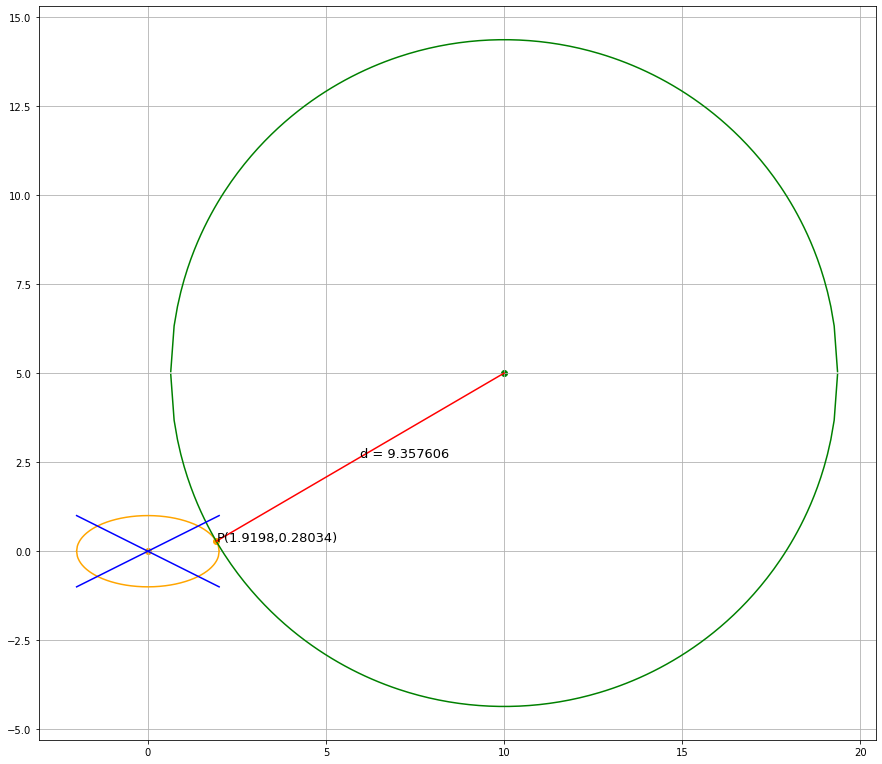

In [266]:
R = min_distance

x = np.linspace(-0.99999*a, 0.99999*a, 200)
x_c = np.linspace(xq-0.99999*R, xq+0.99999*R, 200)

fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(x, upper_ellipse_x(a,b,x), color="orange")
ax.plot(x, lower_ellipse_x(a,b,x), color="orange")
ax.plot(x_c, upper_circle(R, xq, yq, x_c), color="green")
ax.plot(x_c, lower_circle(R, xq, yq, x_c), color="green")
ax.scatter(xq, yq, color="green")
ax.scatter(0,0, color="orange")
ax.scatter(x_min, y_min, color="orange")
ax.plot([xq, x_min], [yq, y_min], color="red")

ax.plot(np.linspace(-a,a), b/a*np.linspace(-a,a), color="blue")
ax.plot(np.linspace(-a,a), -b/a*np.linspace(-a,a), color="blue")

ax.text((xq+x_min)/2, (yq+y_min)/2, f'd = {np.round(min_distance,6)}', fontsize=13)
ax.text(x_min, y_min, f'P({np.round(x_min,5)},{np.round(y_min,5)})', fontsize =13)
ax.grid()
ax.set_aspect(1)

plt.show()